## Observations and Insights 

In [1]:
%matplotlib notebook
%matplotlib inline

In [180]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice.
totalmice = len(merge_df["Mouse ID"].value_counts())

totalmice


249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data_df = merge_df.drop_duplicates(
    subset = ['Mouse ID', 'Timepoint'],
    keep = 'last').reset_index(drop = True)


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 


In [152]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
# Checking the number of mice in the clean DataFrame.
clean_totalmice = len(clean_data_df["Mouse ID"].value_counts())

clean_totalmice

249

## Summary Statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean values
mean_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#mean_value_df

#median values
median_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#median_value_df

#variance values
variance_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#variance_value_df

#standard deviation (stdv) values 
stdv_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#stdv_value_df

#standard error of the mean (SEM) values
sem_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#sem_value_df

# Assemble the resulting series into a single summary dataframe.
total_summary_df = pd.DataFrame({"Mean": mean_value_df, "Median": median_value_df, "Variance": variance_value_df, 
                                 "Standard Deviation": sem_value_df, "SEM": sem_value_df})


In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
total_summary_df

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.382993,50.783528,43.220205,0.526358,0.526358
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


## Bar and Pie Charts

<AxesSubplot:>

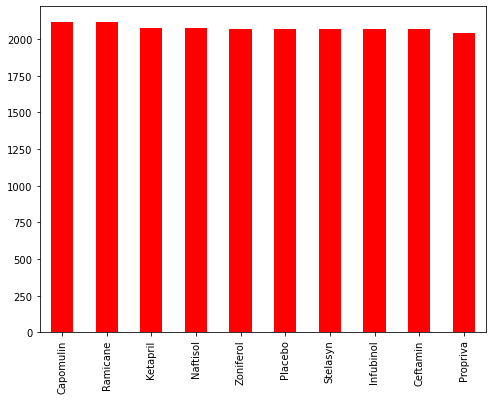

In [222]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen = clean_data_df["Drug Regimen"].value_counts()
timepoints = clean_data_df["Timepoint"].count()

regimen_and_timepoints = regimen.add(timepoints, fill_value=0)

regimen_and_timepoints.plot(kind="bar", figsize=(8,6), facecolor="red")

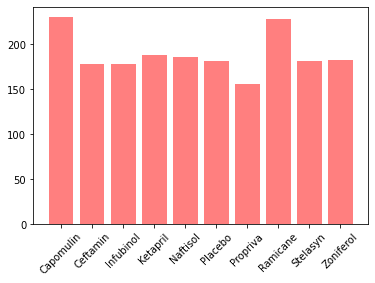

In [220]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#grouping by player
mice_group = clean_data_df.groupby("Drug Regimen")
print(mice_group)
#regimen totals
regimen_totals_df = mice_group["Timepoint"].count()
regimen_totals_df.shape

#create list for y-axis
py_y_axis = list(regimen_totals_df)
py_y_axis

#extract info for x-axis
py_x_data = regimen_totals_df.reset_index()
py_x_data

#create list for x-axis
py_x_data_list = list(x_widget1["Drug Regimen"])
py_x_data_list

#create an array to give a numeric value for the x axis data
py_x_axis = np.arange(len(x_widget2))

#create graph
plt.bar(py_x_axis, py_y_axis, color='r', alpha=0.5, align="center")

#add labels to the x axis
tick_locations = [value for value in py_x_axis]
plt.xticks(tick_locations, py_x_data_list)
plt.xticks(rotation=45)

plt.show()

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



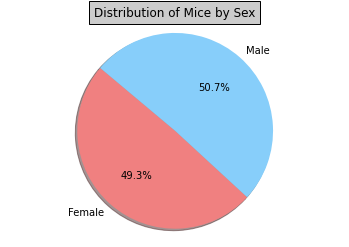

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#group by gender
gender_df = (clean_data_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#obtaining gender totals
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

#creating x and y axis
labels = gender_df["Sex"]
size = gender_df["Count"]

#visual
colors = ["lightcoral", "lightskyblue"]

#creating pie graph
plt.pie(size, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of Mice by Sex", bbox={'facecolor':'0.8', 'pad':5})

#displaying pie graph
plt.show()

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
